In [30]:
# %% [markdown]
# ## 1. Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
%matplotlib inline

In [3]:
# Set a seaborn style for aesthetics
sns.set(style="whitegrid")


In [4]:
# %%
# Load the dataset
df = pd.read_csv('nifty_options_20_09_2024.csv')


In [13]:

# Display the columns and a sample of the data
print("Dataset Columns:", df.columns.tolist())
display(df.head())

Dataset Columns: ['date', 'time', 'symbol', 'open', 'high', 'low', 'close', 'oi', 'volume']


,date,time,symbol,open,high,low,close,oi,volume
0,2024-09-20,09:20:00,NIFTY26SEP2416000CE,9471.35,9471.35,9471.35,9471.35,333175.0,101
1,2024-09-20,09:53:00,NIFTY26SEP2416000CE,9576.95,9576.95,9576.95,9576.95,333175.0,50
2,2024-09-20,10:41:00,NIFTY26SEP2416000CE,9668.30,9668.30,9668.30,9668.30,333125.0,25
3,2024-09-20,10:57:00,NIFTY26SEP2416000CE,9668.30,9668.30,9668.30,9668.30,333125.0,25
4,2024-09-20,11:48:00,NIFTY26SEP2416000CE,9630.20,9630.20,9630.20,9630.20,333125.0,50


In [6]:
# %%
# Get summary statistics for numeric columns
display(df.describe())


,open,high,low,close,oi,volume
count,52538.000000,52538.000000,52538.000000,52538.000000,5.253800e+04,5.253800e+04
mean,243.288562,244.995613,241.618185,243.319469,1.624256e+06,5.872306e+04
std,630.969666,631.649101,630.317660,630.998533,2.101306e+06,1.189567e+05
min,0.500000,0.500000,0.500000,0.500000,0.000000e+00,2.500000e+01
25%,3.050000,3.100000,3.000000,3.050000,2.307000e+05,1.475000e+03
50%,12.500000,12.850000,12.175000,12.500000,7.511250e+05,1.332500e+04
75%,204.087500,208.675000,199.437500,204.187500,2.135400e+06,6.276875e+04
max,9800.000000,9800.000000,9800.000000,9800.000000,1.288115e+07,2.540550e+06


In [7]:
# %%
# Check for missing values in each column
print("Missing values in each column:")
display(df.isnull().sum())


Missing values in each column:


date      0
time      0
symbol    0
open      0
high      0
low       0
close     0
oi        0
volume    0
dtype: int64

In [14]:
# %%
# Convert 'date' and 'time' columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.sort_values('datetime', inplace=True)  # Sort by datetime for time series analysis

In [16]:
display(df[['open', 'high', 'low', 'close', 'oi', 'volume']].describe())


,open,high,low,close,oi,volume
count,52538.000000,52538.000000,52538.000000,52538.000000,5.253800e+04,5.253800e+04
mean,243.288562,244.995613,241.618185,243.319469,1.624256e+06,5.872306e+04
std,630.969666,631.649101,630.317660,630.998533,2.101306e+06,1.189567e+05
min,0.500000,0.500000,0.500000,0.500000,0.000000e+00,2.500000e+01
25%,3.050000,3.100000,3.000000,3.050000,2.307000e+05,1.475000e+03
50%,12.500000,12.850000,12.175000,12.500000,7.511250e+05,1.332500e+04
75%,204.087500,208.675000,199.437500,204.187500,2.135400e+06,6.276875e+04
max,9800.000000,9800.000000,9800.000000,9800.000000,1.288115e+07,2.540550e+06


In [17]:

# %%
# Check for missing values in each column
print("Missing values in each column:")
display(df.isnull().sum())

Missing values in each column:


date        0
time        0
symbol      0
open        0
high        0
low         0
close       0
oi          0
volume      0
datetime    0
dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


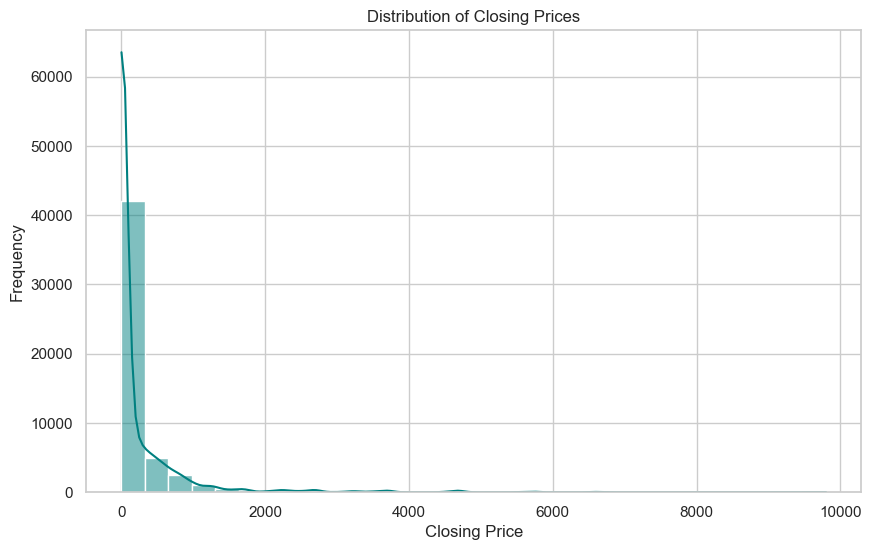

In [18]:
# %%
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True, color='teal')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

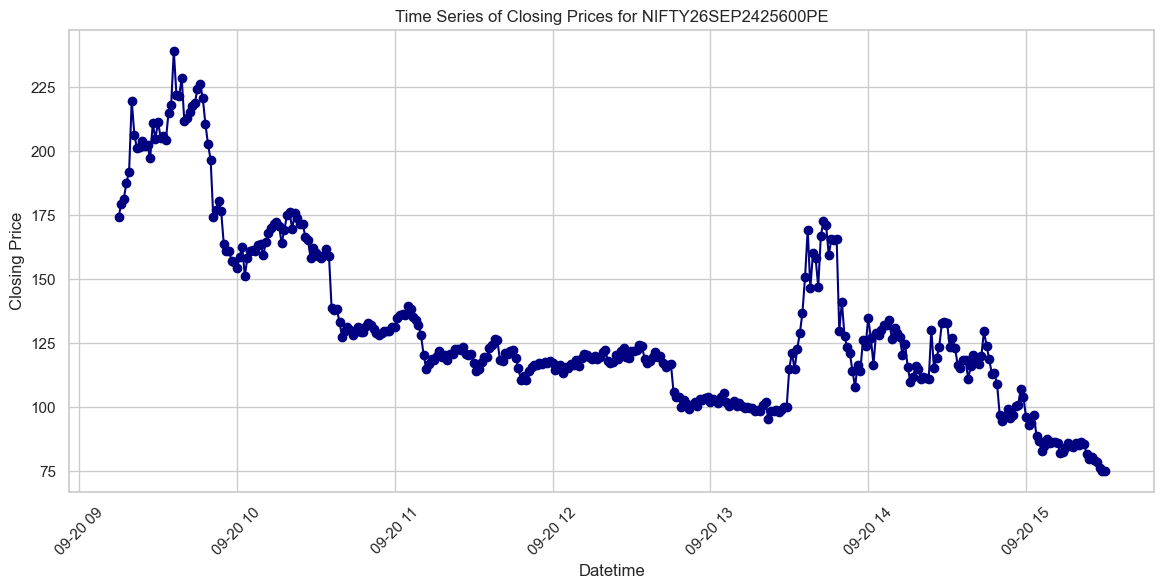

In [19]:
# %%
# Select a symbol from the dataset (for example, the first one)
selected_symbol = df['symbol'].iloc[0]
symbol_df = df[df['symbol'] == selected_symbol]

plt.figure(figsize=(14, 6))
plt.plot(symbol_df['datetime'], symbol_df['close'], marker='o', linestyle='-', color='navy')
plt.title(f'Time Series of Closing Prices for {selected_symbol}')
plt.xlabel('Datetime')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

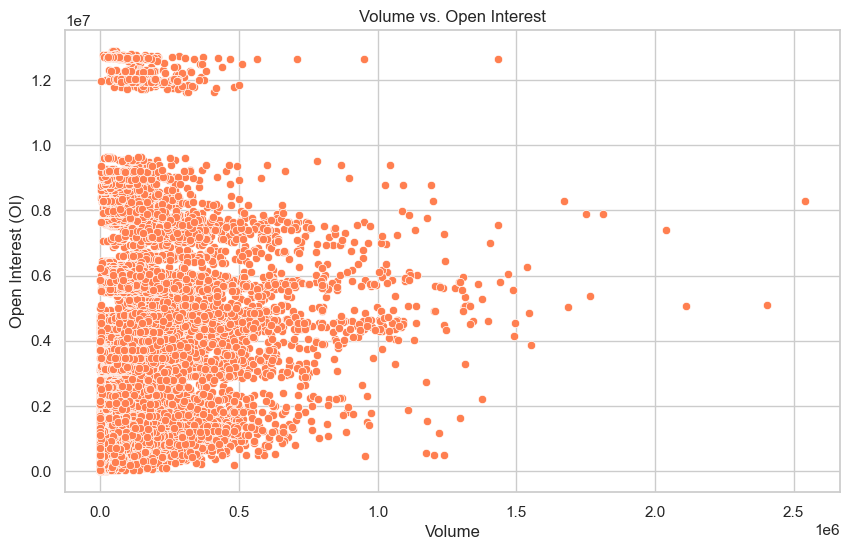

In [20]:
# %%
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume', y='oi', data=df, color='coral')
plt.title('Volume vs. Open Interest')
plt.xlabel('Volume')
plt.ylabel('Open Interest (OI)')
plt.show()

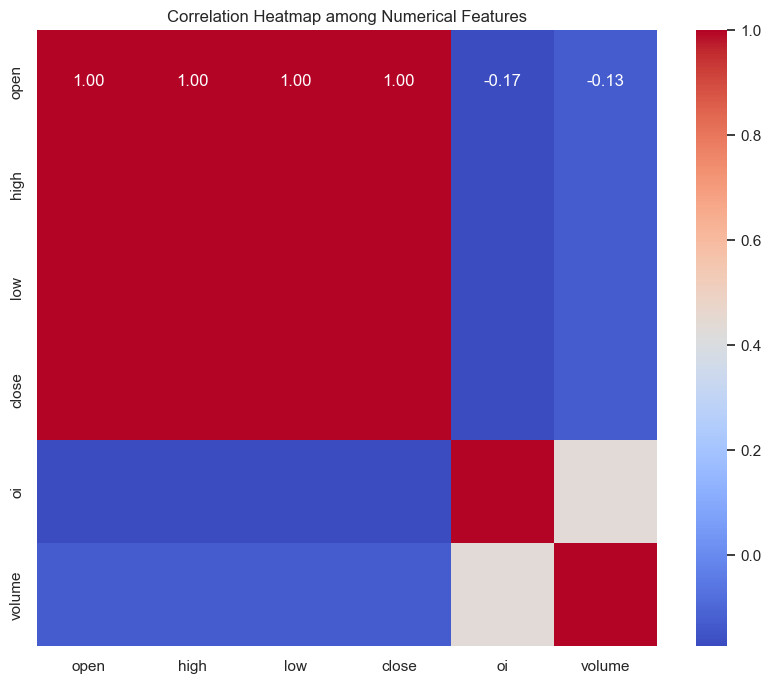

In [21]:
# ### 3.4 Correlation Heatmap among Numerical Features

# %%
plt.figure(figsize=(10, 8))
numeric_cols = ['open', 'high', 'low', 'close', 'oi', 'volume']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap among Numerical Features')
plt.show()

In [22]:

# %%
# Define the features and the target variable
features = ['open', 'high', 'low', 'oi', 'volume']
target = 'close'

# Verify that all columns exist
if all(col in df.columns for col in features + [target]):
    X = df[features]
    y = df[target]
else:
    missing = [col for col in features + [target] if col not in df.columns]
    raise ValueError(f"The following required columns are missing in the dataset: {missing}")

# %%
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# %%
from sklearn.metrics import mean_squared_error, r2_score

In [26]:

# Generate predictions on the testing set
y_pred = model.predict(X_test)

In [27]:

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 Score): {:.2f}".format(r2))



Mean Squared Error (MSE): 3.21
R-squared (R2 Score): 1.00


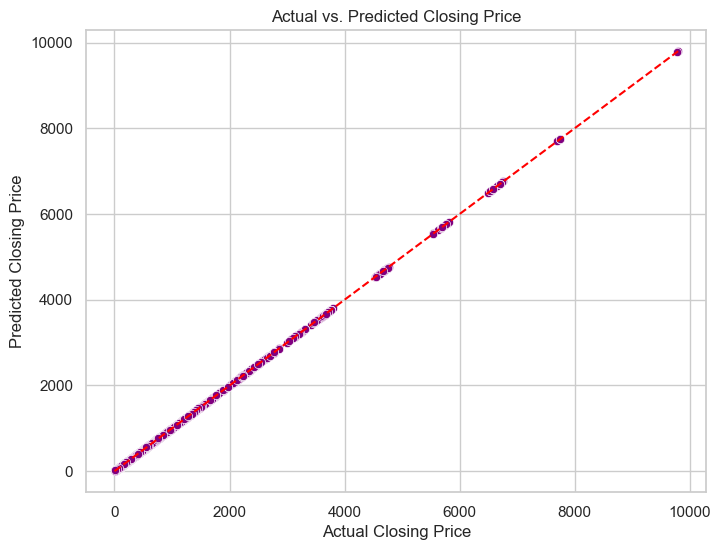

In [29]:
# %%
# Plot Actual vs. Predicted closing prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs. Predicted Closing Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()

In [31]:
# Save the model as a .pkl file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved to model.pkl")

Model saved to model.pkl
